In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.2.1 requires jax>=0.4.8, but you have jax 0.3.25 which is incompatible.
flax 0.6.9 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import zipfile
import io
import openpyxl
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive

In [ ]:
# zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/content.zip", 'r')
# zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/data")
# zip_ref.close()

In [ ]:
fruit_dir = '/content/drive/MyDrive/Colab Notebooks/data/archive/fruits-360_dataset/fruits-360/Training'

ds_fruit = tf.keras.preprocessing.image_dataset_from_directory(fruit_dir)

Found 3050 files belonging to 131 classes.


In [ ]:
# Listing Dir

ds_fruit.class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [ ]:
from tensorflow.python import image
#checking images and shapes

for image_batch, labels_batch in ds_fruit:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


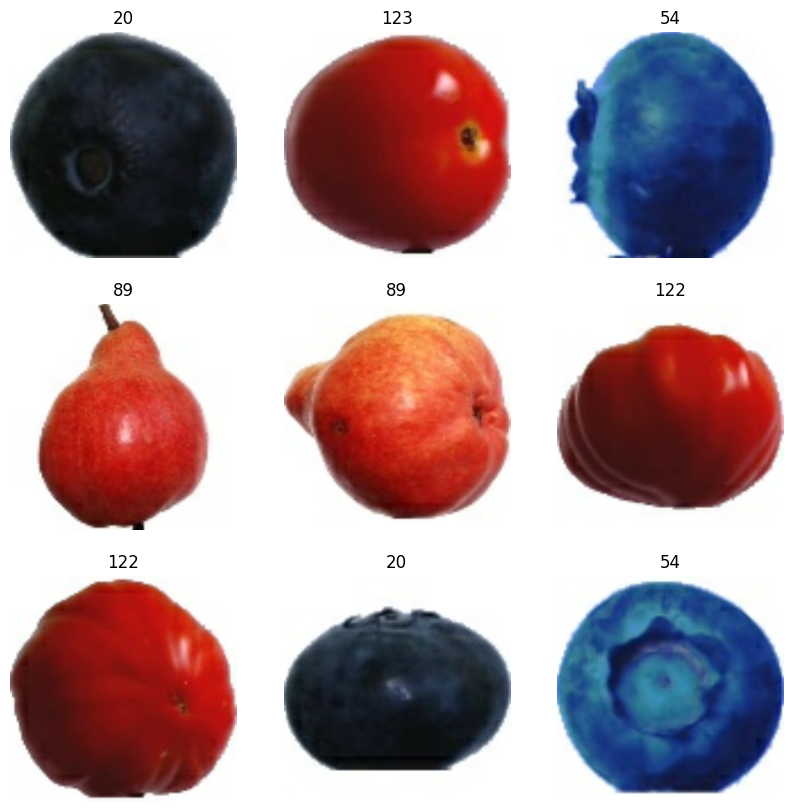

In [ ]:
# Lable 0 is cat and 1 is dog. Displaying the images

plt.figure(figsize=(10, 10))
for images,labels in ds_fruit.take(1):
  for i in range(9):
    pi = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

In [ ]:
# Parameters

batch_size = 64
img_height = 256
img_width = 256

In [ ]:
# Data augmentation
from tensorflow.keras import layers 
data_augmentaion  = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    fruit_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    fruit_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 3050 files belonging to 131 classes.
Using 2440 files for training.
Found 3050 files belonging to 131 classes.
Using 610 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
class_names = val_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

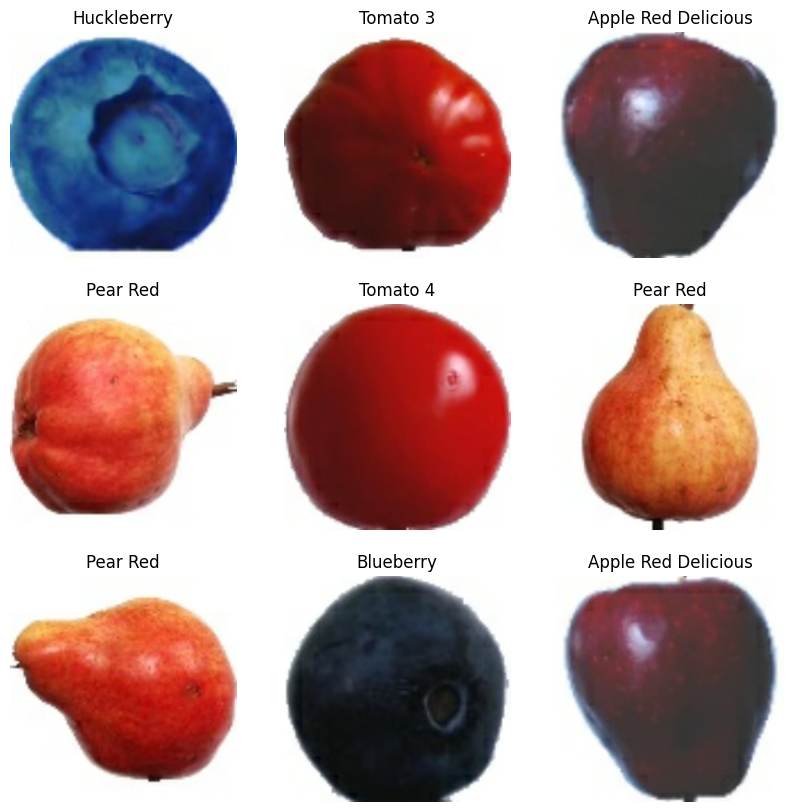

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 256, 256, 3)
(64,)


In [ ]:
# Sequential model / CNN model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(131, activation = 'softmax')])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
39/39 [==============================] - 380s 10s/step - loss: 3.0326 - accuracy: 0.7668 - val_loss: 3.2874 - val_accuracy: 0.5852
Epoch 2/20
39/39 [==============================] - 354s 9s/step - loss: 0.4411 - accuracy: 0.9238 - val_loss: 0.1398 - val_accuracy: 0.9361
Epoch 3/20
39/39 [==============================] - 332s 8s/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 16.0287 - val_accuracy: 0.4492
Epoch 4/20
39/39 [==============================] - 361s 9s/step - loss: 1.5092 - accuracy: 0.9676 - val_loss: 0.0207 - val_accuracy: 0.9885
Epoch 5/20
39/39 [==============================] - 351s 9s/step - loss: 9.1102e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9951
Epoch 6/20
39/39 [==============================] - 334s 8s/step - loss: 2.2481e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 339s 9s/step - loss: 4.9140e-06 - accuracy: 1.0000 - val_loss: 6.2355e-04 - val_accuracy: 1.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)      

In [ ]:
model.evaluate(val_ds)

10/10 [==============================] - 21s 2s/step - loss: 0.0684 - accuracy: 0.9918


[0.06840657442808151, 0.9918032884597778]

In [ ]:
import os 
import shutil
import glob

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import scipy
import numpy as np
import matplotlib.pyplot as plt

import PIL
import PIL.Image

2.12.0


In [ ]:
pre_trained_model = InceptionV3(input_shape = (256, 256, 3), 
                                include_top = False,
                                weights = None)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_95 (BatchN  (None, 127, 127, 32  96         ['conv2d_98[0][0]']              
 ormalization)                  )                                                      

In [ ]:
orig_weights = pre_trained_model.get_weights()
print(type(orig_weights))
print(" ")
print(len(orig_weights))


<class 'list'>
 
376


In [ ]:
n_layers = 0 
for layer in pre_trained_model.layers:
  print(layer)
  n_layers += 1

print(" ")
print("Total # layers of InceptionV3 Model are :", n_layers)

 
Total # layers of InceptionV3 Model are : 311


In [ ]:

weight_1 = pre_trained_model.layers[1].get_weights()
print(len(weight_1))

1


In [ ]:
#Getting dimensions for 1st hidden layer
weight_1_0 = np.array(weight_1[0])
print(weight_1_0.shape)

(3, 3, 3, 32)


In [ ]:
# Freezing the layer model
for layer in pre_trained_model.layers:
  layer.trainable = False 

pre_trained_model.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_95 (BatchN  (None, 127, 127, 32  96         ['conv2d_98[0][0]']              
 ormalization)                  )                                                      

In [ ]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Flatten the o/p layer to 1 dimension and adding a fully connected layer with 1,024 hidden units and Relu activation

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)

In [ ]:
# Add a final sigmoid layer for classification
x = layers.Dense (1, activation = 'sigmoid')(x) 
pretrain_model = Model(pre_trained_model.input, x)

In [ ]:
pretrain_model.compile(optimizer = RMSprop(learning_rate = 0.0001),
                       loss = 'binary_crossentropy',
                       metrics = ['acc'])

In [ ]:
pretrain_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_95 (BatchN  (None, 127, 127, 32  96         ['conv2d_98[0][0]']              
 ormalization)                  )                                                             

In [ ]:
#Add data-augmentation parameters to ImageDataGenrator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40, 
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
import random
from shutil import copyfile
import os

In [ ]:
from keras.models import load_model

model.save("Fruitmodel.h5")

In [ ]:

import tensorflow as tf
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
test_generator.classes[22687]

NameError: ignored